EDA (Exploratory Data Analysis) 탐색적 데이터 분석

1) 정의
수집한 데이터가 들어왔을 때, 이를 다양한 각도에서 관찰하고 이해하는 과정입니다. 한마디로 데이터를 분석
하기 전에 그래프나 통계적인 방법으로 자료를 직관적으로 바라보는 과정입니다.

2) 필요한 이유
데이터의 분포 및 값을 검토함으로써 데이터가 표현하는 현상을 더 잘 이해하고, 데이터에 대한 잠재적인 문제를 발견할 수 있습니다. 이를 통해, 본격적인 분석에 들어가기에 앞서 데이터의 수집을 결정할 수 있습니다.

다양한 각도에서 살펴보는 과정을 통해 문제 정의 단계에서 미쳐 발생하지 못했을 다양한 패턴을 발견하고, 이를 바탕으로 기존의 가설을 수정하거나 새로운 가설을 세울 수 있습니다.

# 6.3 탐색적 데이터 분석

## 6.3.2 데이터 둘러보기

In [1]:
# 주어진 데이터가 어떻게 구성되어 있는지 살펴보기!
# 판다스로 훈련, 테스트, 제출 샘플 데이터를 DataFrame 형태로 불러오기

import numpy as np   # 넘파이 import
import pandas as pd  #  판다스 import

train = pd.read_csv("bike_train.csv")    # 훈련 데이터
test = pd.read_csv("bike_test.csv")      # 테스트 데이터
submission = pd.read_csv("sampleSubmission.csv") # 제출 샘플 데이터

In [2]:
# 훈련 데이터와 테스트 데이터 크기 확인
train.shape, test.shape

((10886, 12), (6493, 9))

In [3]:
# 훈련 데이터 둘러보기
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Cf_
count : 자전거 대여 수량 (타깃 값)

weather : 날씨 (1 : 맑음. 2 : 옅은 안개, 약간 흐림 ... )

In [4]:
# 테스트 데이터 둘러보기
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
# 제출 샘플 데이터 둘러보기
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [6]:
# info() 함수로 결측값 개수와 데이터 타입 파악 (훈련 데이터)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## 6.3.3 더 효과적인 분석을 위한 피처 엔지니어링

Cf_
- 일부 데이터는 시각화하기에 적합하지 않은 형태일 수 있음 (ex. datetime)
- 실질적으로 숫자로 들어가 있기 때문에 나눠야 함 >> split() 사용

In [7]:
print(train["datetime"])

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object


In [8]:
print(train["datetime"][100])             # datetime 100번째 원소
print(train["datetime"][100].split())     # 공백 기준으로 문자열 나누기
print(train["datetime"][100].split()[0])  # 날짜
print(train["datetime"][100].split()[1])  # 시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [9]:
# 시간 문자열을 시, 분, 초로 나누기
print(train["datetime"][100].split()[1])  # 시간
print(train["datetime"][100].split()[1].split(":"))     # ":" 기준으로 문자열 나누기
print(train["datetime"][100].split()[1].split(":")[0])  # 시간
print(train["datetime"][100].split()[1].split(":")[1])  # 분
print(train["datetime"][100].split()[1].split(":")[2])  # 초

09:00:00
['09', '00', '00']
09
00
00


In [10]:
# 판다스 apply( ) 함수로 앞서 살펴본 로직을 datetime에 적용해 날짜(date), 연도(year),
# 월(month), 일(day), 시(hour), 분(minute), 초(second) 피처 생성

train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

Cf_
- lambda : 함수 생성과 실행
- 파생피처 : 기존 피처에서 파생된 피처를 '파생 피처'라고 함

In [11]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00


In [12]:
# 요일 피처 생성
# datetime과 calendar 라이브러리 활용

from datetime import datetime   #  datetime 라이브러리 import
import calendar

print(train["date"][100])  # 날짜
print(datetime.strptime(train["date"][100], "%Y-%m-%d"))  # datetime 타입으로 변경
# 정수로 요일 반환
print(datetime.strptime(train["date"][100], "%Y-%m-%d").weekday())
# 문자열로 요일 반환
print(calendar.day_name[datetime.strptime(train["date"][100], "%Y-%m-%d").weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [13]:
# 0은 월요일, 1은 화요일, 2는 수요일순으로 매핑
# 단, 모델 훈련 시에는 피처 값을 문자로 바꾸면 안 됨(머신러닝 모델은 숫자만 인식)

In [14]:
# 앞 로직을 apply() 함수로 적용해 요일(weekday) 피처 추가
train["weekday"] = train["date"].apply(
    lambda dateString:
    calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])

In [15]:
# season과 weather 피처 추가
# 두 피처는 범주형 데이터인데 숫자로 표현되어 있어서 의미 파악이 어려움
# 시각화 시 의미가 잘 드러나도록 map() 함수를 사용해 문자열로 반환

train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter'})
train['weather'] = train['weather'].map({1: 'Clear',
                                        2: 'Mist, Few clouds',
                                        3: 'Light Snowm, Rain, Thunderstorm',
                                        4: 'Heavy Rain, Thunderstorm, Snow, Fog'})

## 6.3.4 데이터 시각화
- 시각화는 탐색적 데이터 분석에서 가장 중요한 부분
  - 데이터 분포나 데이터 간 관계를 한눈에 파악 >> (편향된 Data를 파악할 수 있음)
  - 모델링에 도움될 정보를 얻을 수 있음

In [16]:
# 시각화에 앞서 두 라이브러리를 임포트
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 6.3.4 데이터 시각화 | 분포도

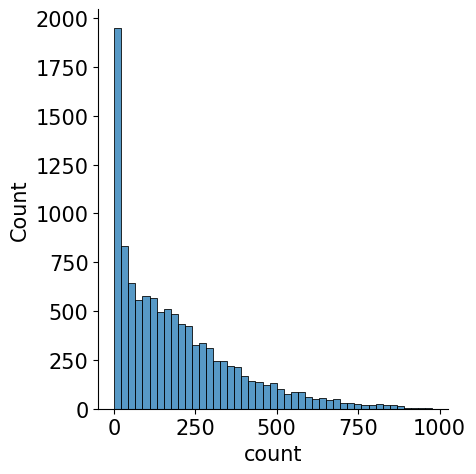

In [17]:
mpl.rc('font', size=15)       # 폰트 크기를 15로 설정
sns.displot(train["count"]);  # 분포도 출력

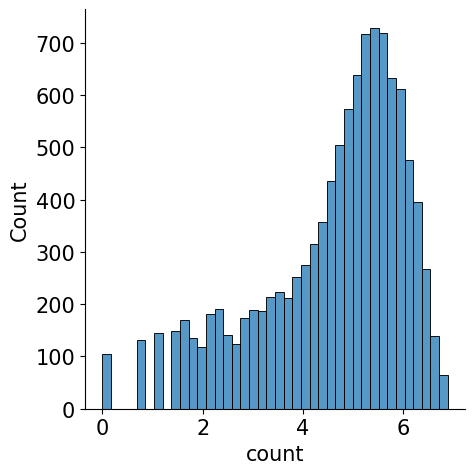

In [18]:
# 타깃값 로그 변환   # ( 정규분포 값을 나타내는 것이 좋기 때문에 )
sns.displot(np.log(train["count"]));

## 6.3.4 데이터 시각화 | 막대 그래프
  - 연도, 월, 일, 시, 분, 초별 평균 대여 수량을 막대 그래프로 시각화

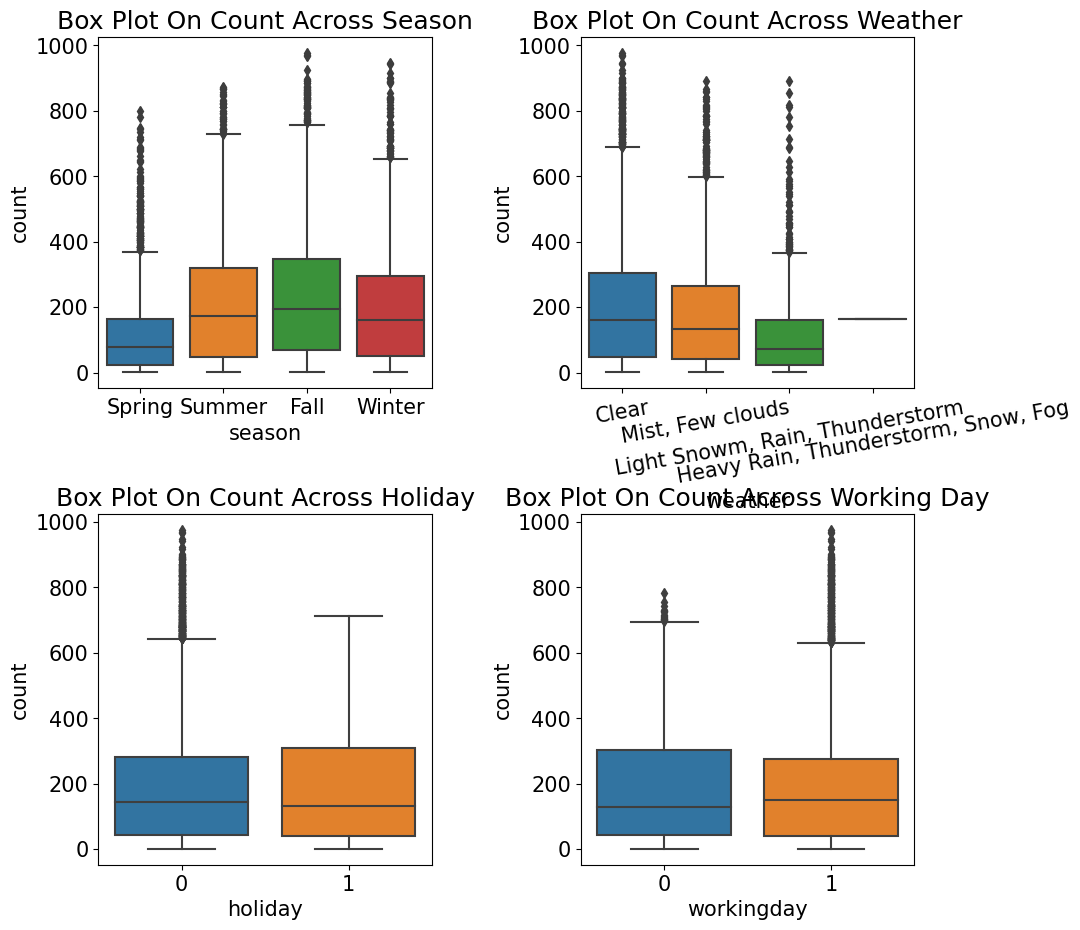

In [19]:
# 스텝1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2)  # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 스텝2 : 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# 스텝3 : 세부 설정
# 3-1 서브플롯에 제목 달기
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3-2 x축 라벨 겹침 해결
axes[0, 1].tick_params(axis='x', labelrotation=10)  # 10도 회전

## 6.3.4 데이터 시각화 | 포인트플롯
  - 포인트플롯(point plot)은 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 점과 선으로 표시
  - 막대 그래프와 같은 정보를 제공하지만, 한 화면에 여러 그래프를 겹쳐 그리기에 적합

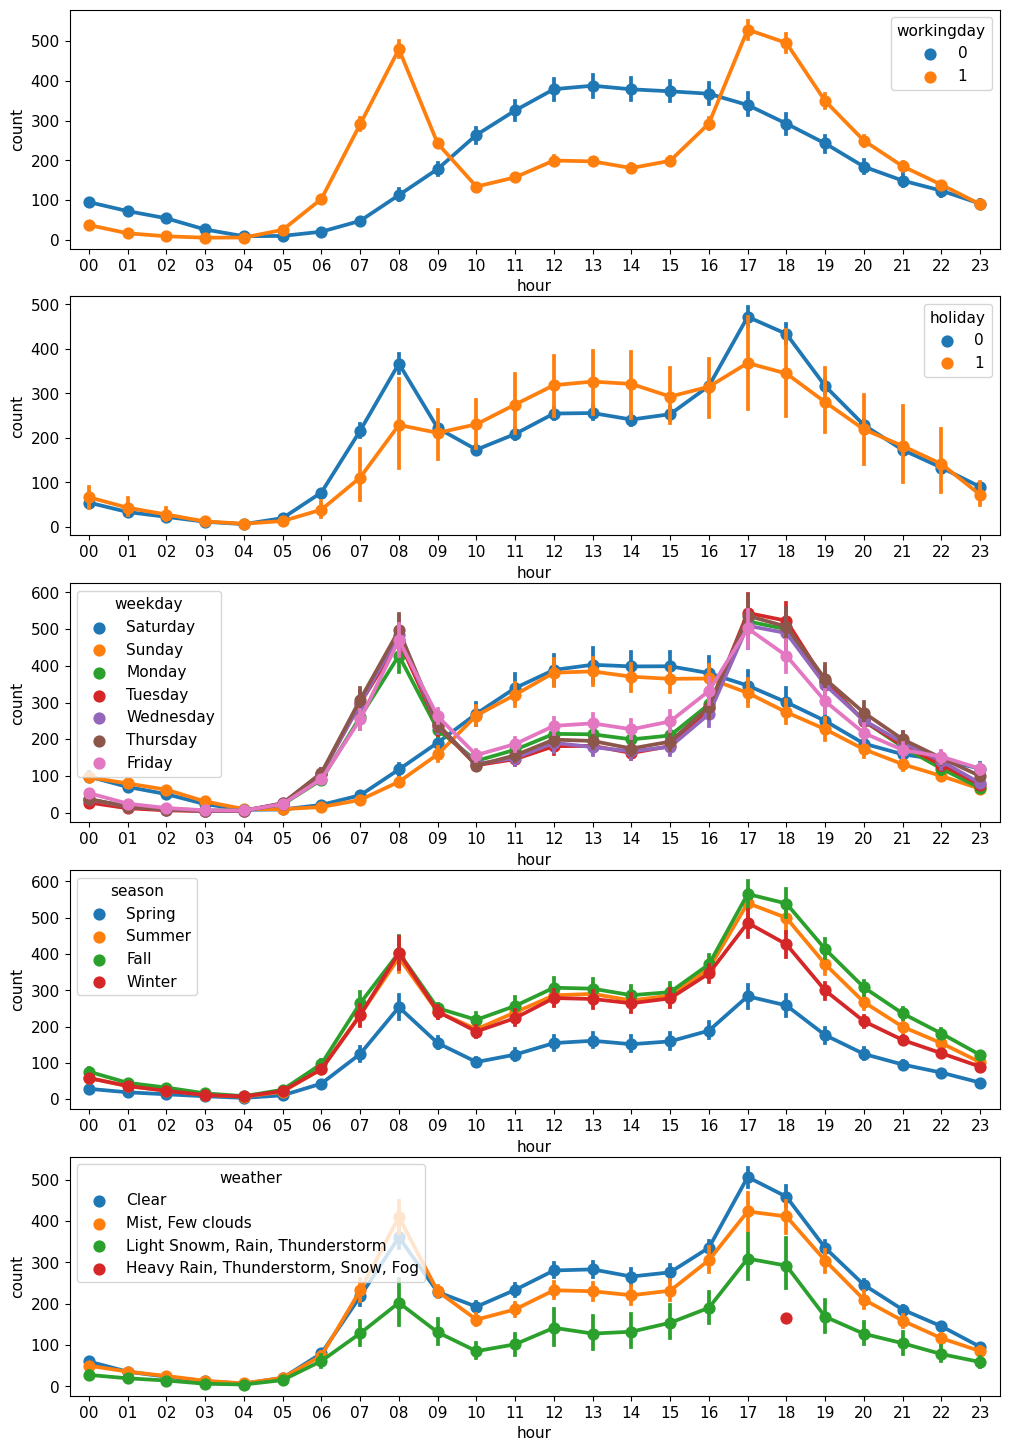

In [20]:
# 스텝1 : m행 n열 Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)  # 5행 1열
figure.set_size_inches(12, 18)

# 스텝2 : 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);

# hue 파라미터에 전달한 피처를 기준으로 그래프가 나뉨

## 6.3.4 데이터 시각화 | 회귀선을 포함한 산점도 그래프
  - 회귀선을 포함한 산점도 그래프는 수치형 데이터 간 상관관계를 파악하는 데 활용

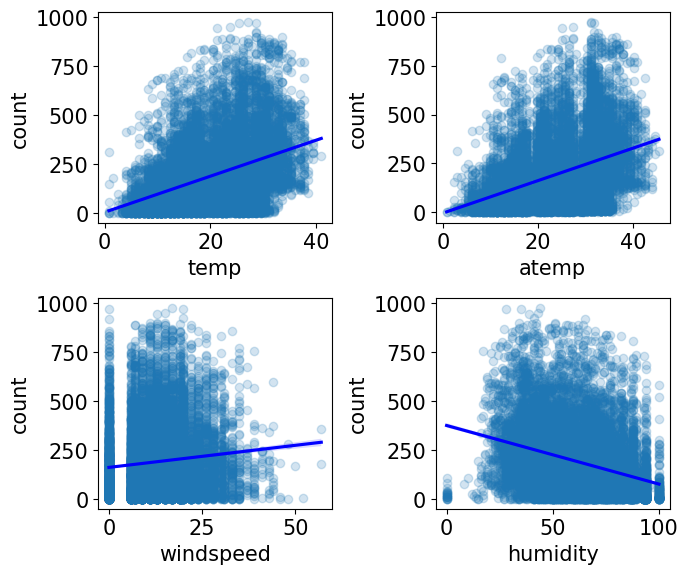

In [21]:
# 스텝1 : m행 n열 Figure 준비
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2)  # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

# 스텝2 : 서브플롯 할당
# 온도, 체감 온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0],
           scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1],
           scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0],
           scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1],
           scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

- 회귀선을 포함한 산점도 그래프 결과

     [그래프 1]  [그래프 2]

     [그래프 3]   [그래프 4]


  - 1과 2 온도, 체감 온도와 대여 수량 관계
    - 온도, 체감 온도가 높을수록 대여 수량이 많음
  - 3 풍속과 대여 수량 관계
    - 풍속이 셀수록 대여 수량이 많음
    - 결측치가 많기 때문
    - 결측치가 많은 windspeed 피처는 제거
  - 4 습도와 대여 수량 관계
    - 습하지 않을수록 대여 수량이 많음

## 6.3.4 데이터 시각화 | 히트맵
  - 히트맵(heat map)은 데이터 간 상관관계를 색상으로 시각화하는 그래프
  - 수치형 데이터인 temp, atemp, humidity, windspeed, count 간 상관계수 계산

In [22]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

# 조합이 많아 피처간 관계가 한눈에 들어오지 않음 -> 히트맵이 필요한 순간!

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


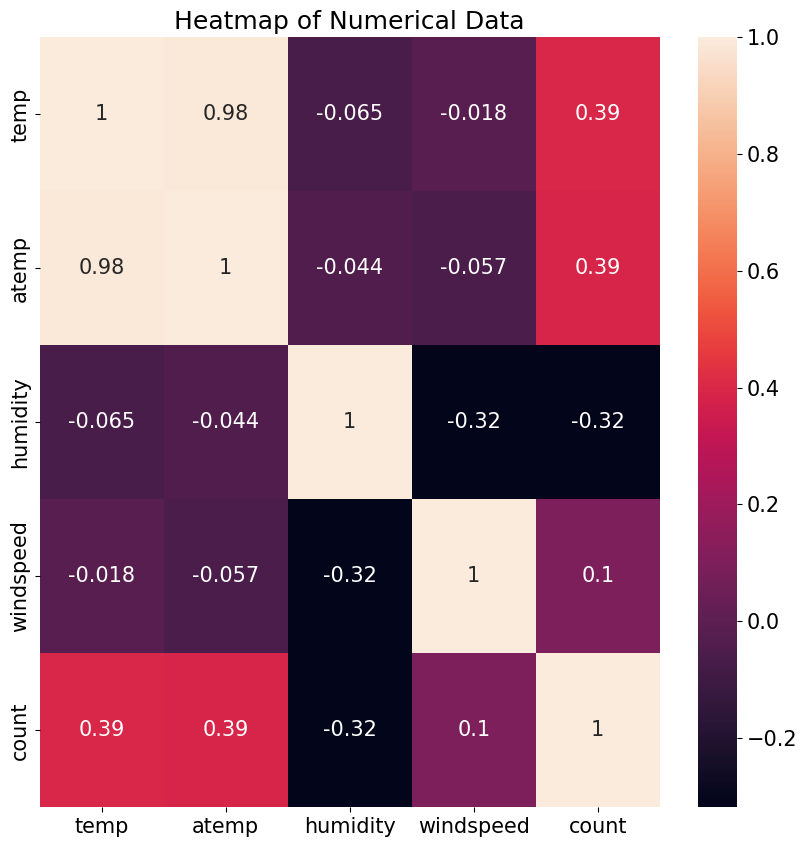

In [23]:
# 히트맵heatmap 시각화
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True)   # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data');

- 타깃값인 count와의 상관관계가 중요!
- 온도(temp)와 대여 수량(count) 간 상관계수는 0.39 (양의 상관관계)
- 풍속(windspeed)과 대여 수량의 상관계수는 0.1 (상관관계가 매우 약함)
- windspeed 피처는 대여 수량 예측에 별 도움을 주지 못하므로 피처 제거
- '회귀선을 포함한 산점도 그래프’ 결과에서도 결측치가 많다는 이유로 같은 결론에 도달한 바 있음

분석 결과 : windspeed 피처 제거

- 1. 타깃값 변환 : 타깃값을 count가 아닌 log(count)로 변환해 사용(마지막에 다시 지수변환해 count로 복원해야 함)
- 2. 파생 피처 추가 : datetime 피처를 분리해 year, month, day, hour, minute, second 피처 생성 가능
- 3. 파생 피처 추가 : datetime에 숨어 있는 또 다른 정보인 요일(weekday) 피처 추가
- 4. 피처 제거 : 테스트 데이터에 없는 피처는 훈련에 사용해도 의미 없음. 따라서 훈련 데이터에만 있는 casual, registered 피처 제거
- 5. 피처 제거 : datetime 피처는 인덱스 역할만 하므로 타깃값 예측에 아무런 도움이 되지 않음
- 6. 피처 제거 : date 피처가 제공하는 정보는 year, month, day 피처에 담겨 있음
- 7. 피처 제거 : month는 season 피처의 세부 분류로 볼 수 있어 month 피처 제거
- 8. 피처 제거 : 막대 그래프 확인 결과, 파생 피처인 day는 분별력이 없음
- 9. 피처 제거 : 막대 그래프 확인 결과, 파생 피처인 minute와 second에는 아무런 정보가 담겨 있지 않음
- 10. 이상치 제거 : 포인트 플롯 확인 결과, weather가 4인 데이터는 이상치
- 11. 피처 제거 : 산점도와 히트맵 확인 결과, windspeed 피처에는 결측값이 많고 대여 수량과의 상관관계가 매우 약함

# 6.4 베이스라인 모델

## 6.4.1 피처 엔지니어링
  - 피처 엔지니어링은 데이터를 변환하는 작업
  - 먼저, 노트북 양식 복사 후 불러오기

In [24]:
train = pd.read_csv("bike_train.csv")    # 훈련 데이터
test = pd.read_csv("bike_test.csv")      # 테스트 데이터
submission = pd.read_csv("sampleSubmission.csv") # 제출 샘플 데이터

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [27]:
# 데이터 합치기 전에 이상치 먼저 제거
# wather가 4인 데이터(폭우, 폭설이 내리는 날 저녁 6시에 대여) 제거
# ( 4: 'Heavy Rain, Thunderstorm, Snow, Fog 제거하기 )

In [28]:
# 훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10885 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10885 non-null  object 
 1   season      10885 non-null  int64  
 2   holiday     10885 non-null  int64  
 3   workingday  10885 non-null  int64  
 4   weather     10885 non-null  int64  
 5   temp        10885 non-null  float64
 6   atemp       10885 non-null  float64
 7   humidity    10885 non-null  int64  
 8   windspeed   10885 non-null  float64
 9   casual      10885 non-null  int64  
 10  registered  10885 non-null  int64  
 11  count       10885 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.1+ MB


In [29]:
# 데이터 합치기
# 훈련 데이터와 테스트 데이터 같은 피처 엔지니어링을 적용하기 위해 두 데이터를 하나로 합침
all_data = pd.concat([train, test], ignore_index=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17378 non-null  object 
 1   season      17378 non-null  int64  
 2   holiday     17378 non-null  int64  
 3   workingday  17378 non-null  int64  
 4   weather     17378 non-null  int64  
 5   temp        17378 non-null  float64
 6   atemp       17378 non-null  float64
 7   humidity    17378 non-null  int64  
 8   windspeed   17378 non-null  float64
 9   casual      10885 non-null  float64
 10  registered  10885 non-null  float64
 11  count       10885 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.6+ MB


In [30]:
# 파생 피처(변수) 추가

from datetime import datetime

# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])

# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])

# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])

# 요일 피처 생성
all_data['weekday'] = all_data['date'].apply(
    lambda dateString:
    datetime.strptime(dateString, "%Y-%m-%d").weekday())

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10885 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10885 non-null  object 
 1   season      10885 non-null  int64  
 2   holiday     10885 non-null  int64  
 3   workingday  10885 non-null  int64  
 4   weather     10885 non-null  int64  
 5   temp        10885 non-null  float64
 6   atemp       10885 non-null  float64
 7   humidity    10885 non-null  int64  
 8   windspeed   10885 non-null  float64
 9   casual      10885 non-null  int64  
 10  registered  10885 non-null  int64  
 11  count       10885 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.1+ MB


In [32]:
# day, minute, second 피처는 생성하지 않음(분석 정리 8, 9)

- casual과 registered 피처는 텍스트 데이터에 없으므로 제거(분석 정리 4)
- datetime 피처는 인덱스 역할이고, date 피처가 갖는 정보는 다른 피처들(year, month, day)에도 
  담겨 있기 때문에 datetime과 date 피처도 필요 없음(분석 정리 5, 6)
- season 피처가 month 피처의 대분류 성격이라 month 피처도 제거(분석 정리 7)
- windspeed 피처도 타깃값과 상관관계가 약해서 제거(분석 정리 11)

In [33]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month']
all_data = all_data.drop(drop_features, axis=1)

-  탐색적 데이터 분석에서 얻은 인사이트를 활용해 의미 있는 피처와 불필요한 피처를 구분(피처 선택)
 - 피처가 많다고 무조건 좋은 게 아님
 - 예측 성능을 높이려면 타깃값과 관련 있는 피처가 필요
 - 탐색적 데이터 분석, 피처 중요도, 상관관계 매트릭스, 배경 지식을 종합적으로 활용해 판단해야 함

- 데이터 나누기
 - 모든 피처 엔지니어링을 끝냈으므로 훈련 데이터와 테스트 데이터를 다시 나눔
 - 타깃값이 있으면 훈련 데이터, 없으면 테스트 데이터

In [34]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17378 non-null  int64  
 1   holiday     17378 non-null  int64  
 2   workingday  17378 non-null  int64  
 3   weather     17378 non-null  int64  
 4   temp        17378 non-null  float64
 5   atemp       17378 non-null  float64
 6   humidity    17378 non-null  int64  
 7   count       10885 non-null  float64
 8   year        17378 non-null  object 
 9   hour        17378 non-null  object 
 10  weekday     17378 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 1.5+ MB


In [35]:
 # 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]  # ( ~ : isnull이 아닌 것 ; count가 있는 것 )
X_test = all_data[pd.isnull(all_data['count'])]    # ( isnull인 것 ; count가 없는 것 )

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)
y = train['count']  # 타깃값

# 평가지표 계산 함수 작성
  - 훈련이 제대로 됐는지 확인하려면 능력을 평가할 수단, 즉 평가지표가 필요
  - 본격적인 훈련에 앞서 본 경진대회 평가지표인 RMSLE 계산 함수 생성

In [36]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):  # RMSLE로 평가하기 위한 함수 생성
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
                             
    # RMSLE RM 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

# 모델 훈련
 - 가장 간단한 선형 회귀 모델인 LinearRegression 활용
 - 훈련 전 타깃값 로그변환(분석 정리1)
 - fit()은 사이킷런의 모델 훈련 메서드

In [37]:
# ( 예측이기 때문에 regression )
from sklearn.linear_model import LinearRegression 
linear_reg_model = LinearRegression()   # 선형 회귀 모델 생성


log_y = np.log(y)   # 타깃 값 로그변환
linear_reg_model.fit(X_train, log_y)  # 모델 훈련

# ( 분포의 편향을 방지하기 위해 타깃 값(y)을 log값으로 변환 )

LinearRegression()

# 모델 성능 검증
  - 훈련된 모델로 예측 후 모델 성능 검증
  - 훈련된 모델로 예측 수행

In [38]:
preds = linear_reg_model.predict(X_train)

# 예측이 잘 되었는지 RMSLE 계산

In [39]:
print(f"선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}")

선형회귀의 RMSLE 값 : 1.0205


In [40]:
# rmsle() 함수의 세 번째 인수로 True를 전달했으므로 지수변환을 적용함
# 단순 선형 회귀 모델의 RMSLE 값은 1.02
# ( 선형회귀는 1에 가까울 수록 손실이 적기 때문에 더 정확하다는 뜻 )

In [41]:
# ( L2 : Regularization(Ridge) : 과대적합이 발생하지 않도록 해주는 것 )

# 성능 개선 I : 릿지 회귀 모델

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

In [43]:
# alpha 값 바꿔가면서 교차검증 해보기

# 하이퍼파라미터 값 목록
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# 차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

# 그리드서치(with 릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,   # 릿지 모델
                                    param_grid=ridge_params,   # 하이퍼파라미터 값 목록
                                    scoring=rmsle_scorer,      # 평가지표
                                    cv=5)                      # 교차검증 분할 수

In [44]:
log_y = np.log(y)   # 타깃 값 로그변환
gridsearch_ridge_model.fit(X_train, log_y)  # 모델 훈련

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [45]:
preds = gridsearch_ridge_model.predict(X_train)
preds

array([2.19542191, 2.27906913, 2.38252998, ..., 5.67343858, 5.82790917,
       5.82065826])

In [46]:
print(f"릿지회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}")

릿지회귀의 RMSLE 값 : 1.0205


# 성능 개선 II : 라쏘 회귀 모델

In [47]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()

In [48]:
# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}

# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,   # 라쏘 모델
                                    param_grid=lasso_params,   # 하이퍼파라미터 값 목록
                                    scoring=rmsle_scorer,      # 평가지표
                                    cv=5)               

In [49]:
log_y = np.log(y)   # 타깃값 로그변환
gridsearch_lasso_model.fit(X_train, log_y)  # 모델 훈련

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e+01, 1.00000000e+00, 5.00000000e-01, 3.33333333e-01,
       2.50000000e-01, 1.00000000e-01, 3.33333333e-02, 1.00000000e-02,
       5.00000000e-03, 3.33333333e-03, 2.50000000e-03, 1.25000000e-03,
       1.11111111e-03, 1.00000000e-03]),
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [50]:
log_y = np.log(y)   # 타깃값 로그변환
gridsearch_ridge_model.fit(X_train, log_y)  # 모델 훈련

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [51]:
print(f"라쏘 하이퍼파라미터 :", gridsearch_lasso_model.best_params_)   # ( 라쏘는 rmsle 가 안 됨 )

라쏘 하이퍼파라미터 : {'alpha': 0.00125, 'max_iter': 3000}


In [52]:
# 라쏘의 최적값은 0.00125

In [53]:
# 예측
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)
# 평가
print(f"라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}")

라쏘 회귀 RMSLE 값 : 1.0205


# 성능 개선 III : 랜덤 포레스트 회귀 모델

In [54]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_model = RandomForestRegressor()

# 하이퍼파라미터 값 목록
rf_params = {"random_state":[42], "n_estimators": [100, 120, 140]}

# 그리드서치(with 랜덤포레스트) 객체 생성
gridsearch_RandomForest_model = GridSearchCV(estimator=RandomForest_model,   
                                    param_grid=rf_params,   # 하이퍼파라미터 값 목록
                                    scoring=rmsle_scorer,      # 평가지표
                                    cv=5)                     
log_y = np.log(y)   # 타깃값 로그변환
gridsearch_RandomForest_model.fit(X_train, log_y)   # 모델 훈련

print(f"랜덤포레스트 하이퍼파라미터 :", gridsearch_RandomForest_model.best_params_)

랜덤포레스트 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


In [55]:
# 랜덤 포레스트의 최적의 값은 140

In [58]:
# 예측
preds = gridsearch_RandomForest_model.best_estimator_.predict(X_train)
# 평가
print(f"랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}")

랜덤 포레스트 회귀 RMSLE 값 : 0.1127


- RMSLE 가 1.0205였던 선형 회귀, 릿지, 라쏘에 비해 큰 폭으로 개선됨
- 네 모델 가운데 가장 우수한 모델은 랜덤 포레스트 회귀

In [59]:
# 예측
randomforest_preds = gridsearch_RandomForest_model.best_estimator_.predict(X_test)
submission['count'] = np.exp(randomforest_preds)   # 지수변환
submission.to_csv('submission.csv', index=False)  # 예측 결과를 csv 파일로 저장

In [60]:
submission = pd.read_csv("submission.csv")
submission

,datetime,count
0,2011-01-20 00:00:00,12.127016
1,2011-01-20 01:00:00,4.981274
2,2011-01-20 02:00:00,3.209022
3,2011-01-20 03:00:00,3.503956
4,2011-01-20 04:00:00,2.680269
...,...,...
6488,2012-12-31 19:00:00,212.989952
6489,2012-12-31 20:00:00,170.625628
6490,2012-12-31 21:00:00,99.297557
6491,2012-12-31 22:00:00,100.681092


In [61]:
test = pd.read_csv("./bike_test.csv")   # count값 없음
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
